<a href="https://colab.research.google.com/github/hsallrounder/Application-Of-Machine-Learning-In-Industries-Workshop-2023/blob/main/TSLA_Stock_Prize_Prediction_Application_Of_Machine_Learning_In_Industries_Workshop_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data=pd.read_csv("/content/drive/MyDrive/Datasets/TSLA.csv")

In [5]:
data.head(50)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
1,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
3,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
4,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000
5,2010-07-09,3.516,3.580,3.310,3.480,3.480,20253000
6,2010-07-12,3.590,3.614,3.400,3.410,3.410,11012500
7,2010-07-13,3.478,3.728,3.380,3.628,3.628,13400500
8,2010-07-14,3.588,4.030,3.552,3.968,3.968,20976000
9,2010-07-15,3.988,4.300,3.800,3.978,3.978,18699000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2392 non-null   object 
 1   Open       2392 non-null   float64
 2   High       2392 non-null   float64
 3   Low        2392 non-null   float64
 4   Close      2392 non-null   float64
 5   Adj Close  2392 non-null   float64
 6   Volume     2392 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 130.9+ KB


In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2.392000e+03
mean,36.649554,37.283815,35.986936,36.657329,36.657329,2.711845e+07
std,22.876772,23.231798,22.509281,22.889387,22.889387,2.353644e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,6.852000,6.960000,6.710000,6.869500,6.869500,9.365000e+06
50%,42.445002,43.211000,41.623002,42.334000,42.334000,2.264150e+07
75%,52.797000,53.558498,52.023500,52.780499,52.780499,3.619625e+07
max,87.000000,87.061996,85.269997,86.188004,86.188004,1.858195e+08


In [8]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
np.shape(data)

(2392, 7)

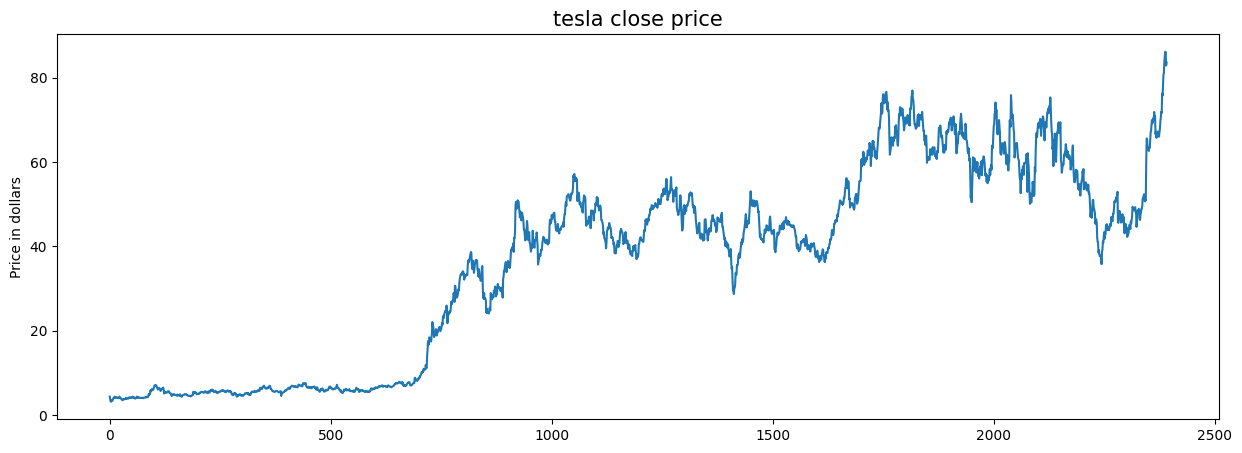

In [10]:
plt.figure(figsize=(15,5))
plt.plot(data['Close'])
plt.title('tesla close price',fontsize=15)
plt.ylabel('Price in dollars')
plt.show()

In [12]:
data[data['Close']==data['Adj Close']].shape

(2392, 7)

In [13]:
data=data.drop(['Adj Close'],axis=1)

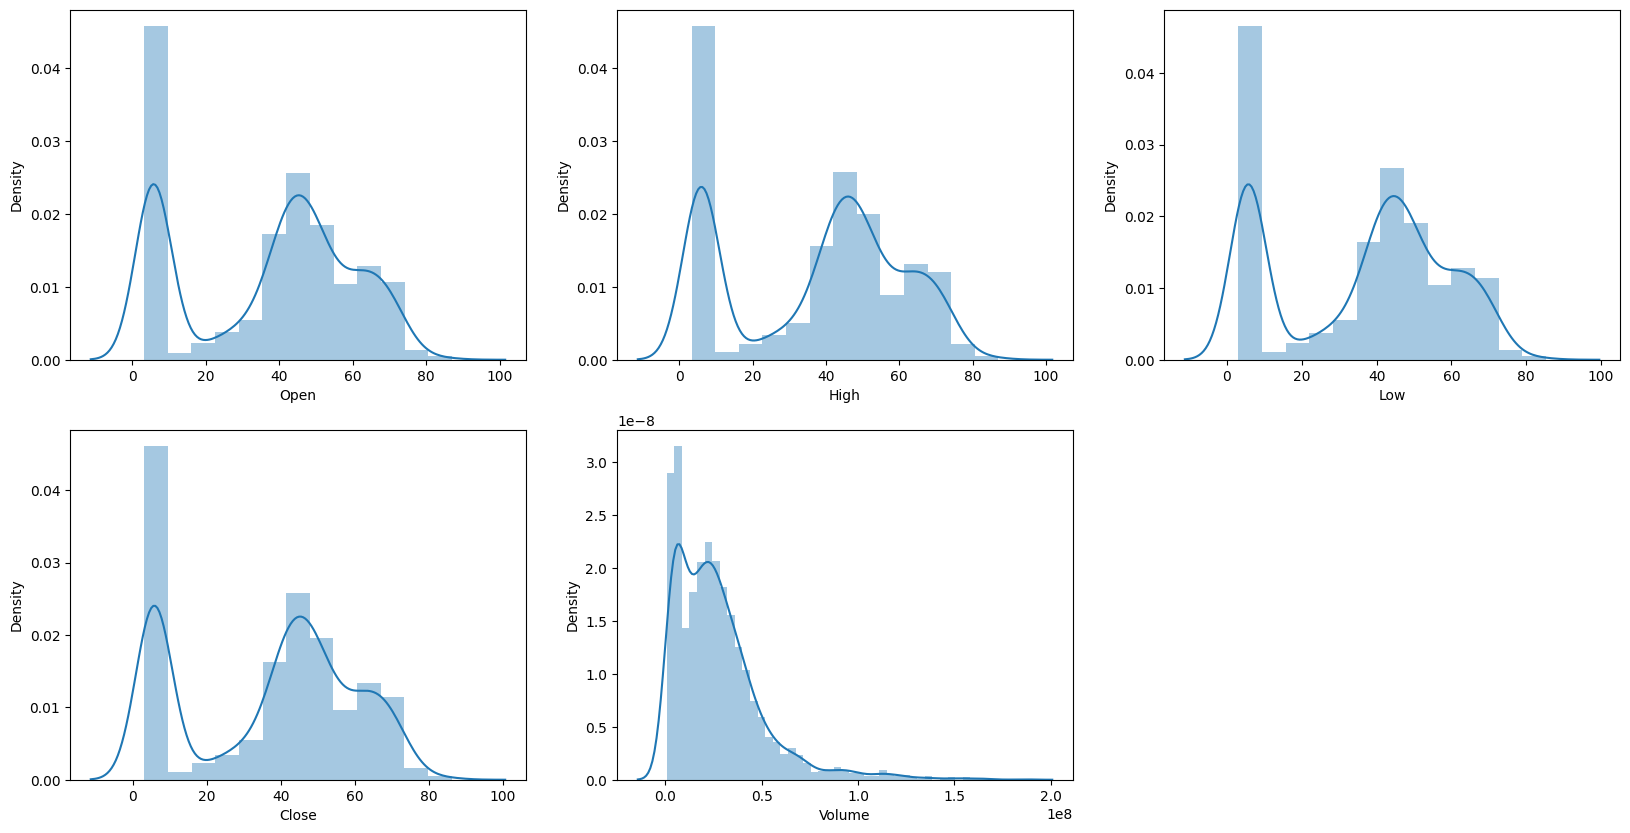

In [14]:
plt.subplots(figsize=(20,10))
features=['Open' ,'High','Low','Close','Volume']
for i,col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(data[col])
plt.show()

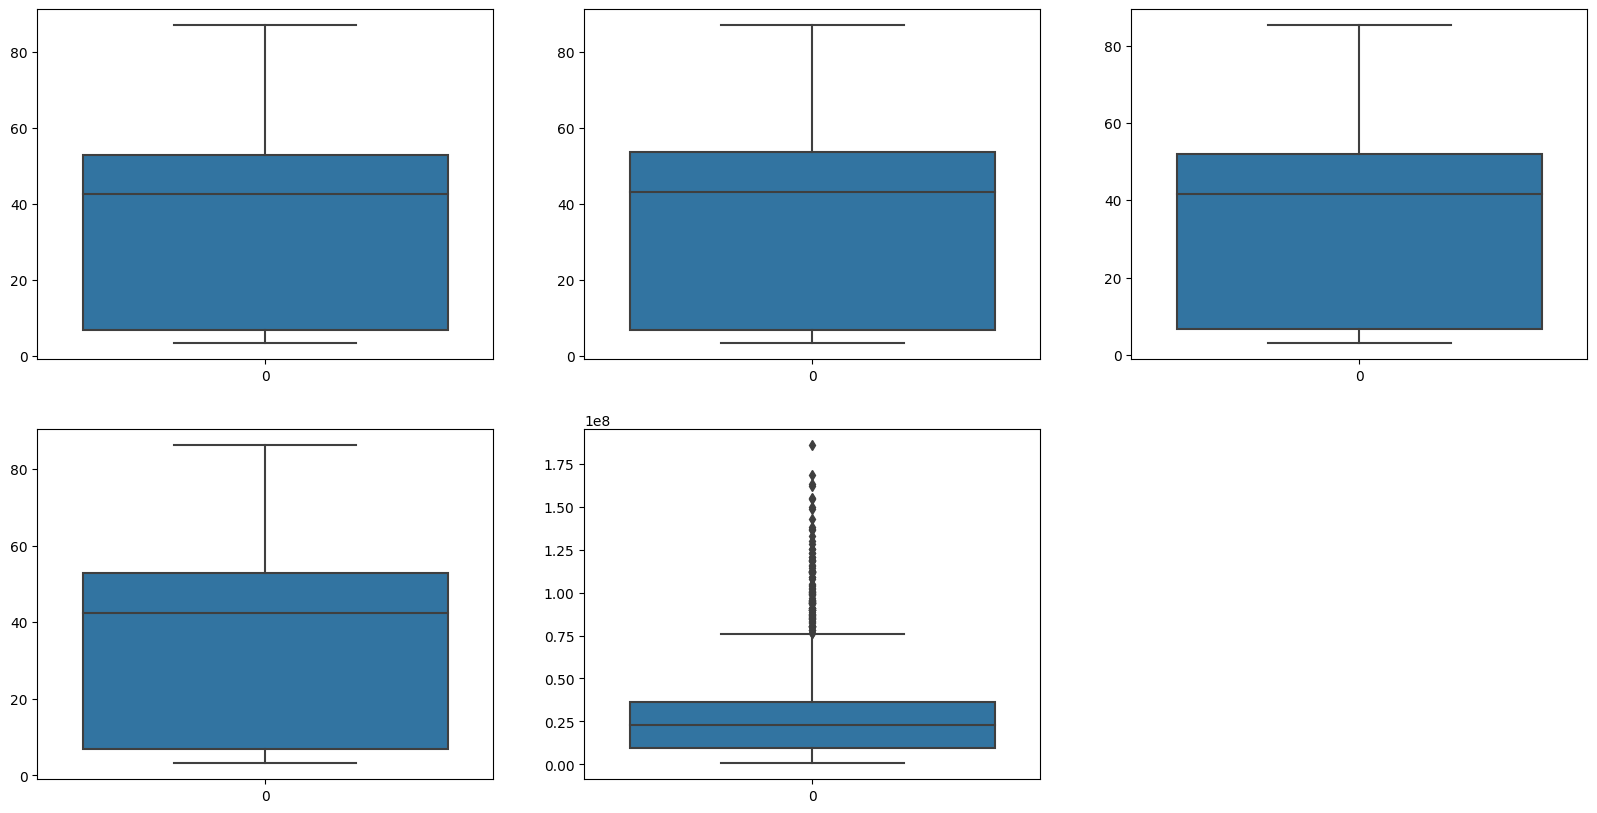

In [15]:
plt.subplots(figsize=(20,10))
for i,col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(data[col])
plt.show()

In [16]:
splitted=data['Date'].str.split('-',expand=True)
len(splitted)
splitted

,0,1,2
0,2010,07,01
1,2010,07,02
2,2010,07,06
3,2010,07,07
4,2010,07,08
...,...,...,...
2387,2019,12,24
2388,2019,12,26
2389,2019,12,27
2390,2019,12,30


In [17]:
data['day']=splitted[2].astype('int')
data['month']=splitted[1].astype('int')
data['year']=splitted[0].astype('int')
data.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2010-07-01,5.000,5.184,4.054,4.392,41094000,1,7,2010
1,2010-07-02,4.600,4.620,3.742,3.840,25699000,2,7,2010
2,2010-07-06,4.000,4.000,3.166,3.222,34334500,6,7,2010
3,2010-07-07,3.280,3.326,2.996,3.160,34608500,7,7,2010
4,2010-07-08,3.228,3.504,3.114,3.492,38557000,8,7,2010


In [18]:
data['is_quarter_end']=np.where(data['month']%3==0,1,0)
data.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2010-07-01,5.000,5.184,4.054,4.392,41094000,1,7,2010,0
1,2010-07-02,4.600,4.620,3.742,3.840,25699000,2,7,2010,0
2,2010-07-06,4.000,4.000,3.166,3.222,34334500,6,7,2010,0
3,2010-07-07,3.280,3.326,2.996,3.160,34608500,7,7,2010,0
4,2010-07-08,3.228,3.504,3.114,3.492,38557000,8,7,2010,0


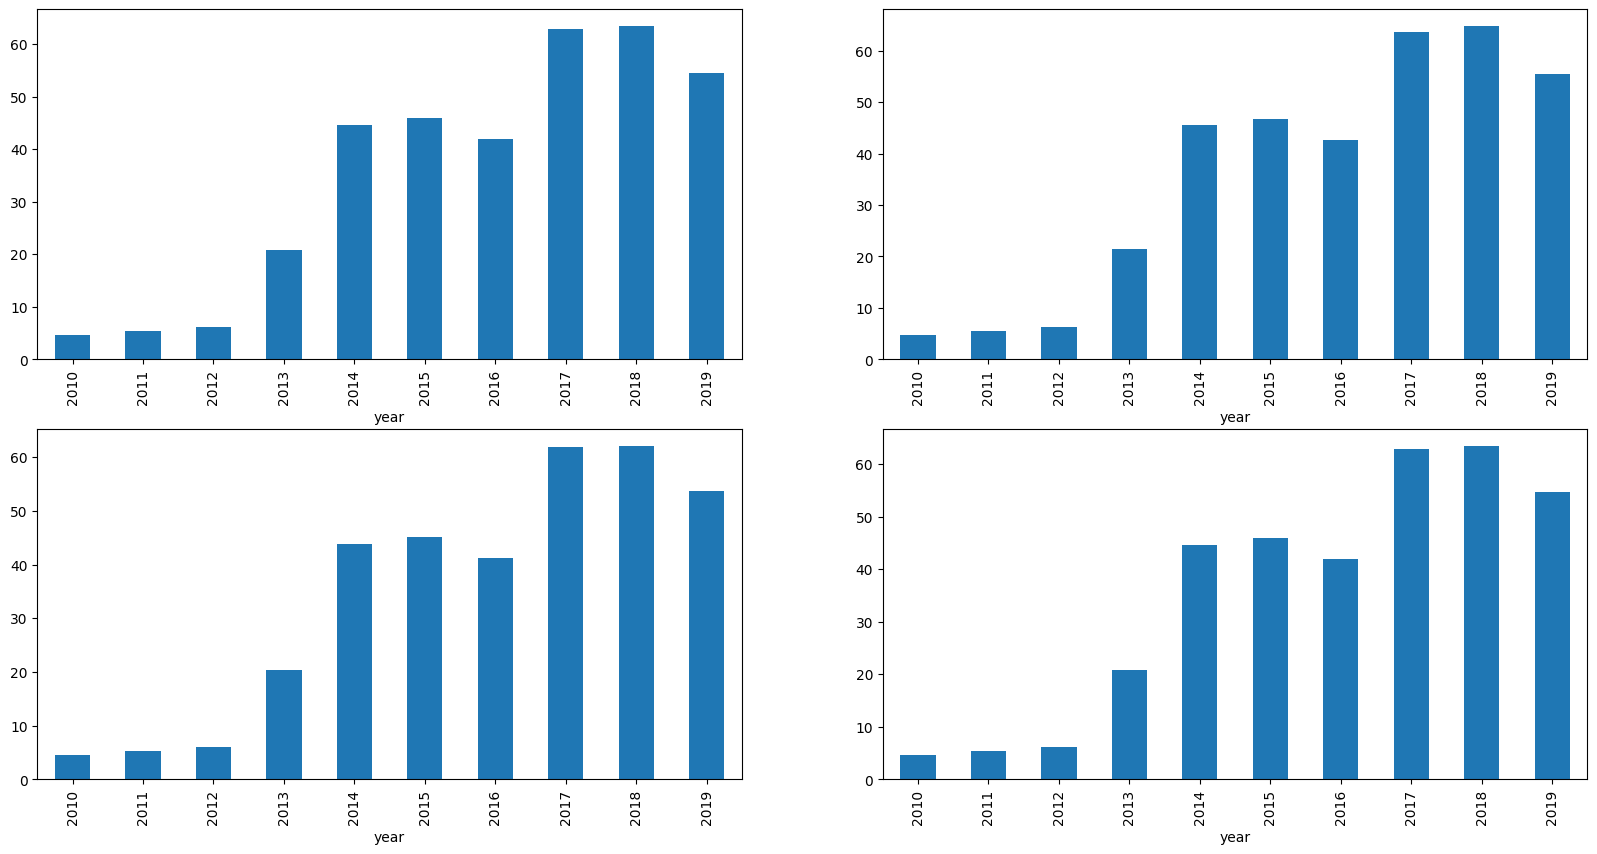

In [19]:
data_grouped=data.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i,col in enumerate(['Open' ,'High','Low','Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [20]:
data.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,36.225407,36.861191,35.552871,36.239856,2.780829e+07,15.702635,6.244668,2014.744668
1,37.496784,38.128005,36.853977,37.491231,2.574048e+07,15.790727,7.601504,2014.709273


In [21]:
data['open-close']=data['Open']-data['Close']
data['low-high']=data['Low']-data['High']
data['target']=np.where(data['Close'].shift(-1)>data['Close'],1,0)

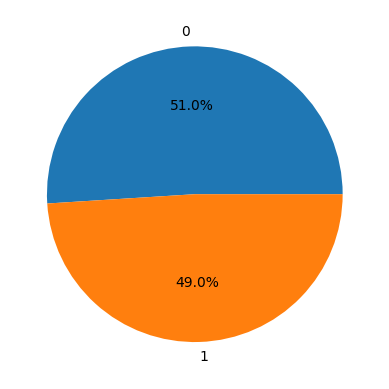

In [22]:
plt.pie(data['target'].value_counts().values,
        labels=[0,1],autopct='%1.1f%%')
plt.show()

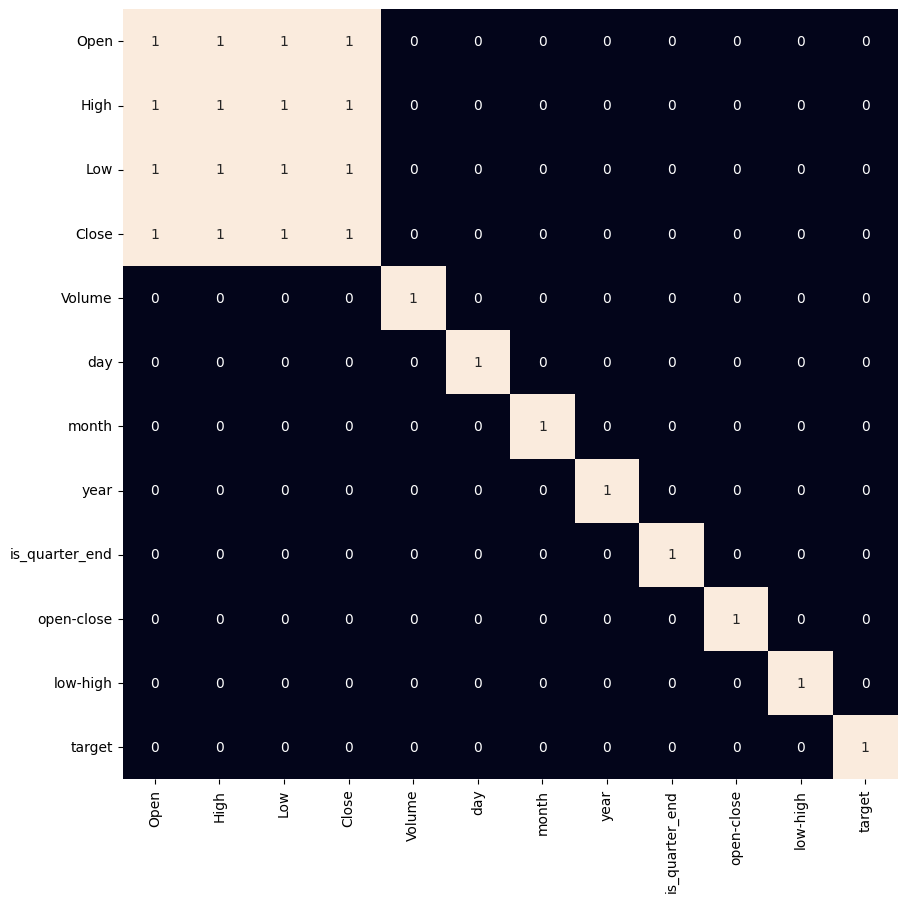

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr()>0.9,annot=True,cbar=False)
plt.show()

In [24]:
features = data[['open-close','low-high','is_quarter_end']]
target=data['target']

scaler =StandardScaler()
features=scaler.fit_transform(features)
X_train,X_valid,Y_train,Y_valid=train_test_split(features,target,test_size=0.1,random_state=2022)
print(X_train.shape,X_valid.shape)

(2152, 3) (240, 3)


In [25]:
models=[LogisticRegression(),SVC(kernel='poly',probability=True),XGBClassifier()]
for i in range(3):
  models[i].fit(X_train,Y_train)
  print(f'{models[i]}: ')
  print('Training Accuracy: ',metrics.roc_auc_score(Y_train,models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy: ',metrics.roc_auc_score(Y_valid,models[i].predict_proba(X_valid)[:,1]))

LogisticRegression(): 
Training Accuracy:  0.5276456100933287
Validation Accuracy:  0.49874999999999997
SVC(kernel='poly', probability=True): 
Training Accuracy:  0.47828206014517805
Validation Accuracy:  0.4834027777777778
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...): 
Training Accuracy:  0.